In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import matplotlib.patches as mpatches

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [2]:
import matplotlib.style as style
# style.use('fivethirtyeight')
# style.use('tableau-colorblind10')
plt.style.use("markerr.mplstyle")

In [3]:
# https://stackoverflow.com/questions/33061785/can-i-load-google-fonts-with-matplotlib-and-jupyter

In [4]:
# grid.linestyle: :
# colors5 = ['#5383ad','#7BA0C0','#a3bdd3','#cbd9e6','#f3f6f9']
colors5 = ['#528abb','#74a1ca','#96b7d6','#b8d1e5','#dbe8f1']
colors2 = ['#274456','#7BA0C0']
white = ['#ffffff']
greys = ['#B3B6BA']
blacks = ['#212121']

In [8]:
zori = pd.read_csv('target.csv',index_col = 0, parse_dates = ['Time'])
zori

,zip_code,City,State,Time,zori_ssa,zori_ssa_diff
0,77494,Houston,TX,2014-01-01,1390.0,NaN
1,77449,Houston,TX,2014-01-01,1202.0,NaN
2,77084,Houston,TX,2014-01-01,1058.0,NaN
3,79936,El Paso,TX,2014-01-01,887.0,NaN
4,78130,San Antonio,TX,2014-01-01,1118.0,NaN
...,...,...,...,...,...,...
19560,76118,Dallas-Fort Worth,TX,2021-07-01,1737.0,197.0
19561,76247,Dallas-Fort Worth,TX,2021-07-01,1937.0,146.0
19562,78756,Austin,TX,2021-07-01,1547.0,-28.0
19563,78721,Austin,TX,2021-07-01,1807.0,345.0


In [ ]:
# data set up
graph_df = zori_time[zori_time['metro'].isin(['Dallas-Fort Worth, TX',  
                      'Houston, TX', 
                      'Austin, TX', 
                      'San Antonio, TX',
                      'El Paso, TX'])]
graph_df = graph_df[graph_df['date'].isin(['2014-01','2021-01'])]

# graphing
fig, ax = plt.subplots()
g = sns.barplot(data = graph_df, y = 'date',x='rent_index',hue='metro',
                hue_order = ['Houston, TX','Austin, TX',
                             'Dallas-Fort Worth, TX','San Antonio, TX','El Paso, TX'],
                ci = None, ax=ax,palette=colors5)
# turn off axis labels and titles
g.set(xlabel='', ylabel='',title='Mean Rent Prices in Texas\n\n\n\n')
# legend
sns.move_legend(g,loc='center left', bbox_to_anchor=(0, 1.1),frameon=False,ncol=3,
                title = '')
# axis spine options are ['left','right','bottom','top']
ax.spines['left'].set_visible(True)
# y axis labels
g.set_yticklabels(labels = ['Jan. 2014','Jan. 2021'])
# make the highlighted features bold. should be the same side with the visible spine
plt.yticks(fontweight='bold')

plt.show()

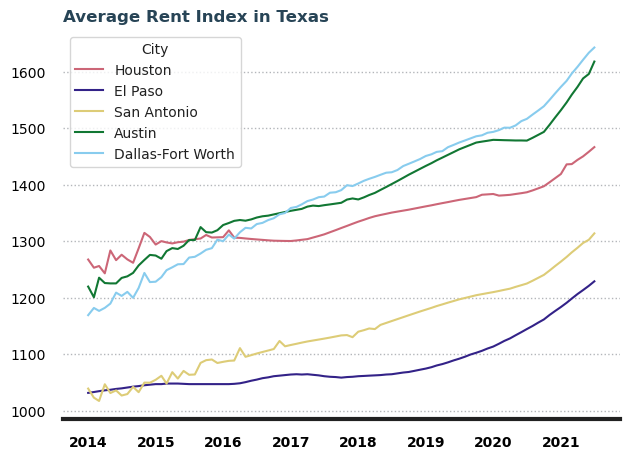

In [10]:
# data set up
colors = ['#cc6677', '#332288', '#ddcc77', '#117733', '#88ccee',]
# graphing
fig, ax = plt.subplots()
g = sns.lineplot(data = zori, x = 'Time',y='zori_ssa',hue='City',ax=ax,
            ci = None, palette= colors)
# remove x axis grid lines that were cluttering the graph
ax.grid(b = None, axis = 'x')
# axis spine options are ['left','right','bottom','top']
ax.spines['bottom'].set_visible(True)
# make the highlighted features bold. should be the same side with the visible spine
plt.xticks(fontweight='bold')

g.set(xlabel='', ylabel='',title='Average Rent Index in Texas')


# # legend
acutal_patch = mpatches.Patch(color=colors[0], 
                           label='Houston')
lasso_patch = mpatches.Patch(color=colors[1], 
                           label='El Paso')
rf_patch = mpatches.Patch(color=colors[2], 
                           label='San Antonio')
xg_patch = mpatches.Patch(color=colors[3], 
                           label='Austin')
xg_patch = mpatches.Patch(color=colors[3], 
                           label='Dallas-Fort Worth')
plt.legend(handles=[acutal_patch,lasso_patch,rf_patch,xg_patch],
           loc='center left', 
           bbox_to_anchor=(-0.02, 1),frameon=False,ncol=2,
                title = '')

ax.yaxis.set_major_formatter('${x:,.0f}')
plt.show()





plt.show()

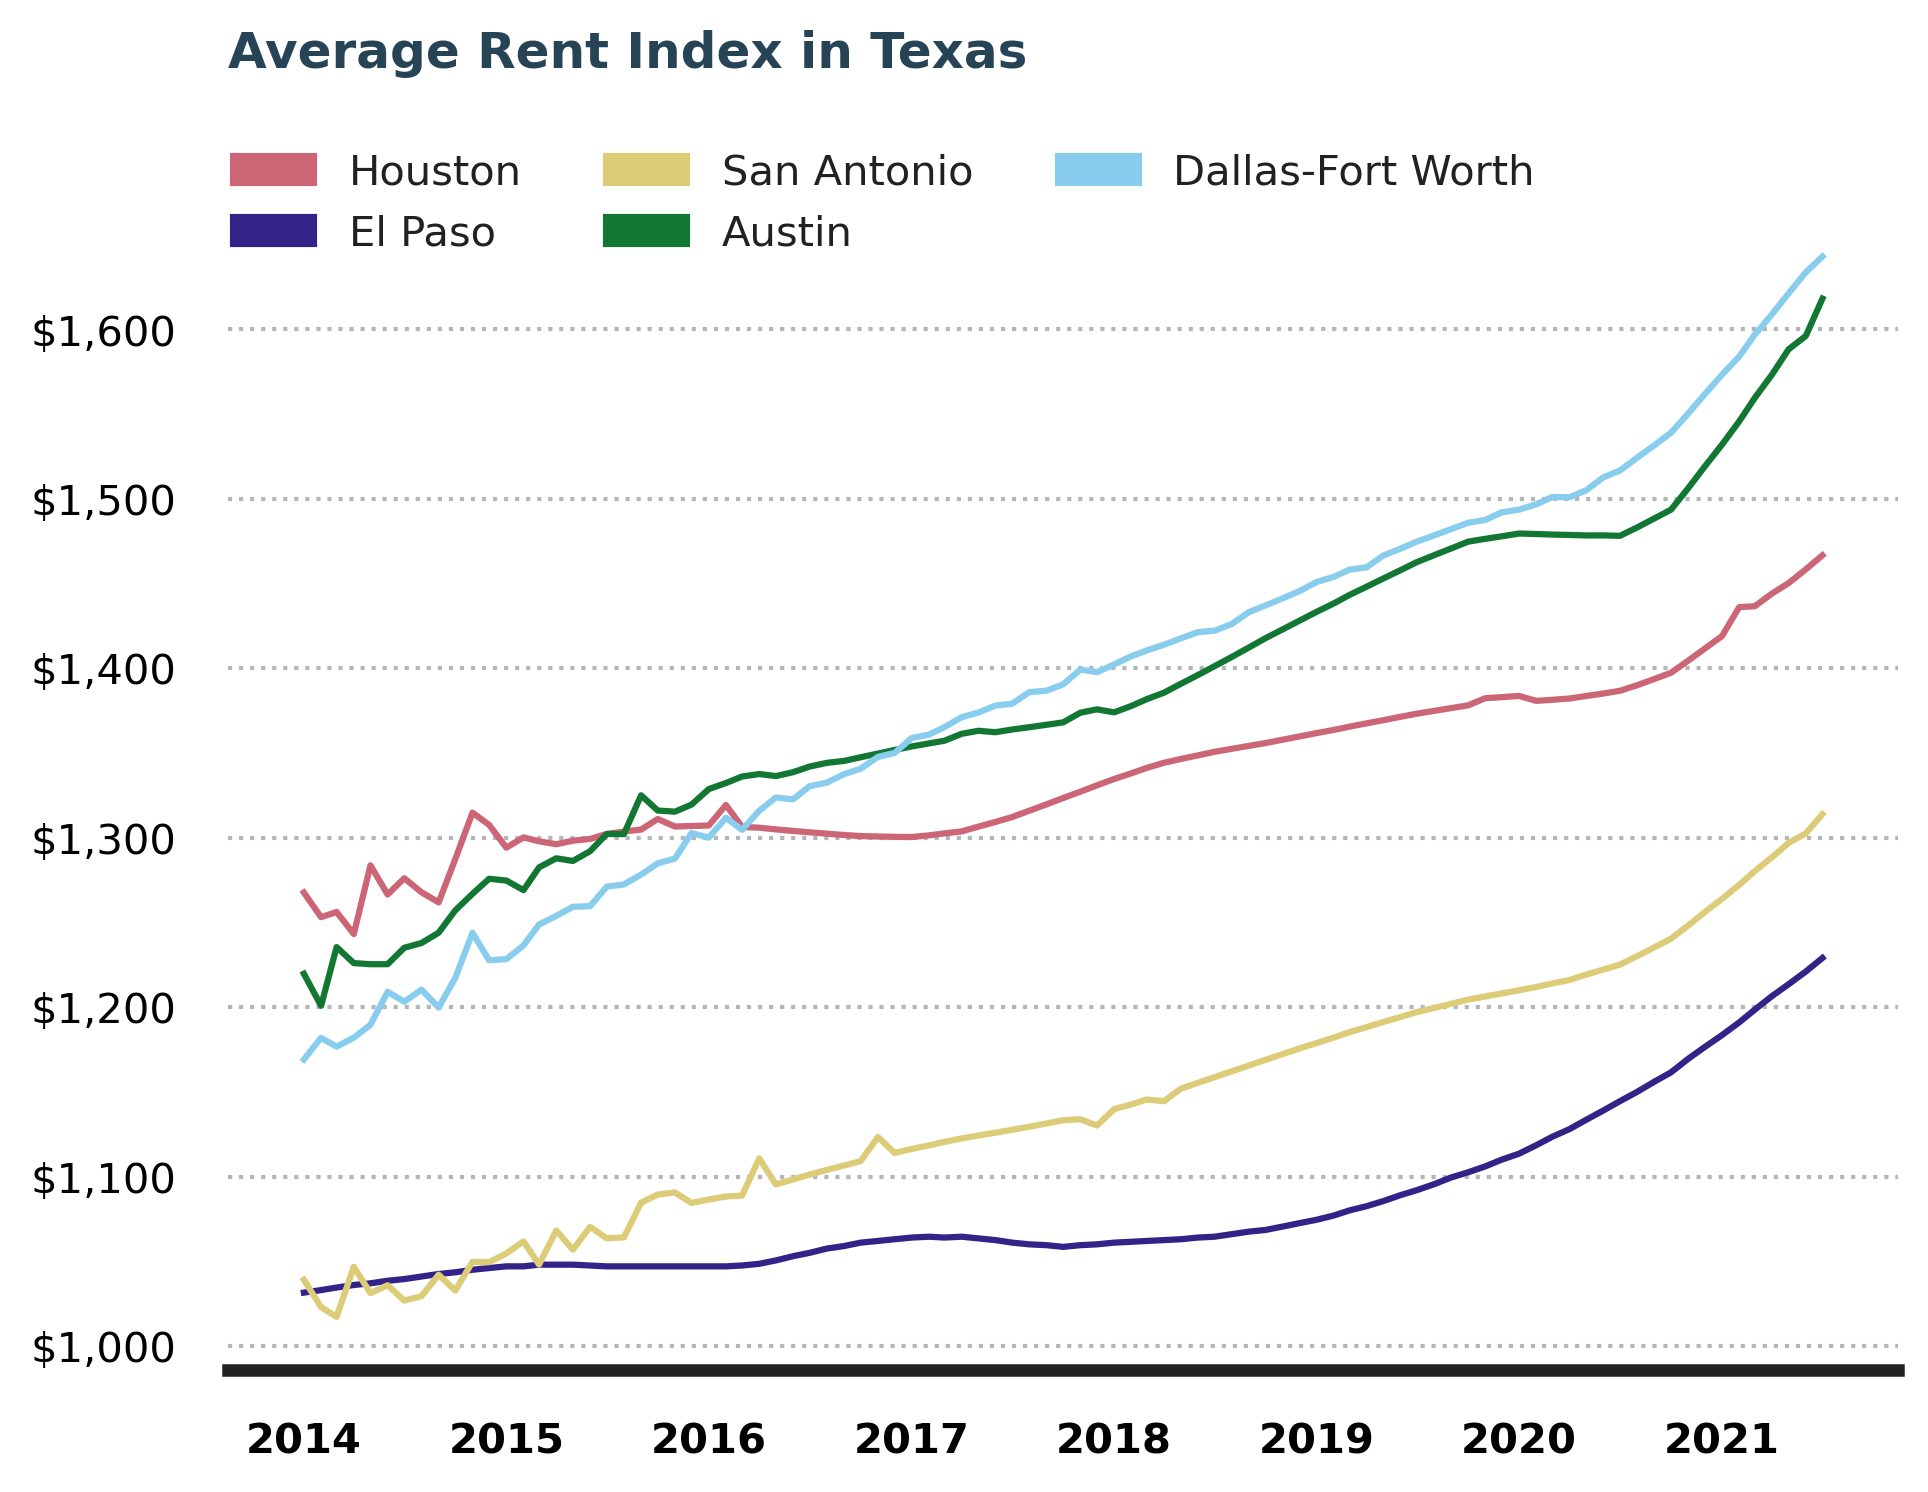

In [17]:
# data set up
colors = ['#cc6677', '#332288', '#ddcc77', '#117733', '#88ccee',]
# graphing
fig, ax = plt.subplots()
g = sns.lineplot(data = zori, x = 'Time',y='zori_ssa',hue='City',ax=ax,
            ci = None, palette= colors)
# remove x axis grid lines that were cluttering the graph
ax.grid(b = None, axis = 'x')
# axis spine options are ['left','right','bottom','top']
ax.spines['bottom'].set_visible(True)
# make the highlighted features bold. should be the same side with the visible spine
plt.xticks(fontweight='bold')

g.set(xlabel='', ylabel='',title='Average Rent Index in Texas\n\n')


# # legend
acutal_patch = mpatches.Patch(color=colors[0], 
                           label='Houston')
lasso_patch = mpatches.Patch(color=colors[1], 
                           label='El Paso')
rf_patch = mpatches.Patch(color=colors[2], 
                           label='San Antonio')
xg_patch = mpatches.Patch(color=colors[3], 
                           label='Austin')
dallas_patch = mpatches.Patch(color=colors[4], 
                           label='Dallas-Fort Worth')
plt.legend(handles=[acutal_patch,lasso_patch,rf_patch,xg_patch,dallas_patch],
           loc='center left', 
           bbox_to_anchor=(-0.02, 1),frameon=False,ncol=3,
                title = '')

ax.yaxis.set_major_formatter('${x:,.0f}')
plt.show()





plt.show()

In [ ]:
zori_time = pd.melt(zori,
    id_vars=['Time'],
    value_vars=[
        'zori_ssa',
        'lower_prediction_bound',
        'upper_prediction_bound'
    ],
)